In [ ]:
## Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from tqdm import tqdm
import variable_engineering as ve
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_columns', 200)

## Reading cleaned data from MiceForest Imputer
train = pd.read_csv('/home/ec2-user/SageMaker/Analytics_Data_Science/American_Express/Evan/amex_train_cleaned.csv')
test = pd.read_csv('/home/ec2-user/SageMaker/Analytics_Data_Science/American_Express/Evan/amex_test_cleaned.csv')

## Printing the first five observations
train.head()

### Variable Engineering:

#### Payment Variables

In [4]:
p_variables = train.columns
[x for x in p_variables if x.startswith('P_')]

['P_2', 'P_3', 'P_4']

<AxesSubplot:xlabel='target', ylabel='P_4'>

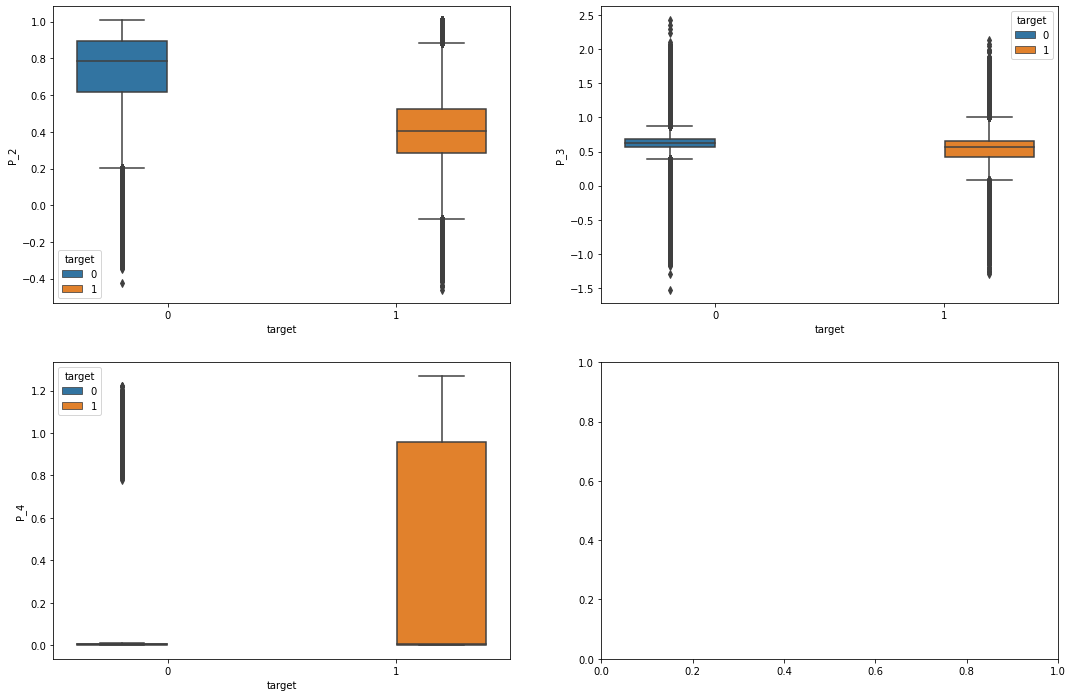

In [5]:
## Creating a new figure
fig, axes = plt.subplots(2, 2, figsize = (18, 12))

sns.boxplot(ax = axes[0, 0], x = 'target', y = 'P_2', hue = 'target', data = train)
sns.boxplot(ax = axes[0, 1], x = 'target', y = 'P_3', hue = 'target', data = train)
sns.boxplot(ax = axes[1, 0], x = 'target', y = 'P_4', hue = 'target', data = train)

<AxesSubplot:xlabel='target', ylabel='P_4_sum'>

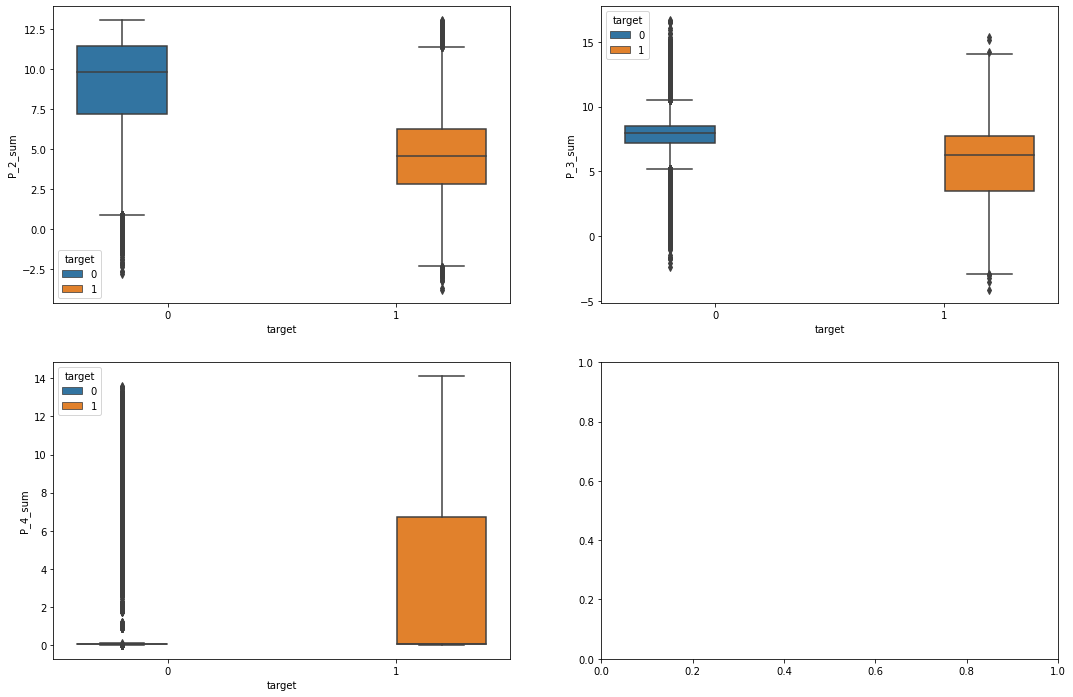

In [6]:
## Sum of 'P' variables
sum_value = train.groupby('customer_ID')[['P_2', 'P_3', 'P_4']].sum().reset_index(drop = False)
target = train.groupby('customer_ID')['target'].max().reset_index(drop = False)
target_sums = sum_value.merge(target, how = 'left', on = 'customer_ID')
target_sums.columns = ['customer_ID', 'P_2_sum', 'P_3_sum', 'P_4_sum', 'target']

## Creating a new figure
fig, axes = plt.subplots(2, 2, figsize = (18, 12))

sns.boxplot(ax = axes[0, 0], x = 'target', y = 'P_2_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[0, 1], x = 'target', y = 'P_3_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[1, 0], x = 'target', y = 'P_4_sum', hue = 'target', data = target_sums)

#### Selections: P_2, P_2_sum, P_3, P_3_sum

In [12]:
## Creating new Payment variables based on analysis and using the variable_engineering.py file

P_2_mean = ve.create_var(train, 'P_2', 'mean', 'P_2_mean')
P_2_median = ve.create_var(train, 'P_2', 'median', 'P_2_median')
P_2_sum = ve.create_var(train, 'P_2', 'sum', 'P_2_sum')

P_3_mean = ve.create_var(train, 'P_3', 'mean', 'P_3_mean')
P_3_median = ve.create_var(train, 'P_3', 'median', 'P_3_median')
P_3_sum = ve.create_var(train, 'P_3', 'sum', 'P_3_sum')

,customer_ID,P_2_mean
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.933594
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0.899902
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0.878418
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0.599121
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0.891602


In [ ]:
## Grouping the data by customer_ID to obtain the mean, median, and sum P_2 variable values
P_2_mean = pd.DataFrame(train.groupby(['customer_ID'])['P_2'].mean()).reset_index(drop = False)
P_2_median = pd.DataFrame(train.groupby(['customer_ID'])['P_2'].median()).reset_index(drop = False)
P_2_sum = pd.DataFrame(train.groupby(['customer_ID'])['P_2'].sum()).reset_index(drop = False)

## Cleaning the resulting data-frames
P_2_mean.columns = ['customer_ID', 'P_2_mean']
P_2_median.columns = ['customer_ID', 'P_2_median']
P_2_sum.columns = ['customer_ID', 'P_2_sum']

## Merging the resulting data-frames together
P_2_variable = P_2_mean.merge(P_2_median, how = 'left', 
                              on = 'customer_ID').merge(P_2_sum, how = 'left', on = 'customer_ID')

In [ ]:
## Grouping the data by customer_ID to obtain the mean, median, and sum P_3 variable values
P_3_mean = pd.DataFrame(train.groupby(['customer_ID'])['P_3'].mean()).reset_index(drop = False)
P_3_median = pd.DataFrame(train.groupby(['customer_ID'])['P_3'].median()).reset_index(drop = False)
P_3_sum = pd.DataFrame(train.groupby(['customer_ID'])['P_3'].sum()).reset_index(drop = False)

## Cleaning the resulting data-frames
P_3_mean.columns = ['customer_ID', 'P_3_mean']
P_3_median.columns = ['customer_ID', 'P_3_median']
P_3_sum.columns = ['customer_ID', 'P_3_sum']

## Merging the resulting data-frames together
P_3_variable = P_3_mean.merge(P_3_median, how = 'left', 
                              on = 'customer_ID').merge(P_3_sum, how = 'left', on = 'customer_ID')

#### Spend Variables

In [ ]:
s_variables = train.columns
[x for x in s_variables if x.startswith('S_')]

In [ ]:
## Creating a new figure
fig, axes = plt.subplots(11, 2, figsize = (18, 100))

sns.boxplot(ax = axes[0, 0], x = 'target', y = 'S_3', hue = 'target', data = train)
sns.boxplot(ax = axes[0, 1], x = 'target', y = 'S_5', hue = 'target', data = train)
sns.boxplot(ax = axes[1, 0], x = 'target', y = 'S_6', hue = 'target', data = train)
sns.boxplot(ax = axes[1, 1], x = 'target', y = 'S_7', hue = 'target', data = train)
sns.boxplot(ax = axes[2, 0], x = 'target', y = 'S_8', hue = 'target', data = train)
sns.boxplot(ax = axes[2, 1], x = 'target', y = 'S_9', hue = 'target', data = train)
sns.boxplot(ax = axes[3, 0], x = 'target', y = 'S_11', hue = 'target', data = train)
sns.boxplot(ax = axes[3, 1], x = 'target', y = 'S_12', hue = 'target', data = train)
sns.boxplot(ax = axes[4, 0], x = 'target', y = 'S_13', hue = 'target', data = train)
sns.boxplot(ax = axes[4, 1], x = 'target', y = 'S_15', hue = 'target', data = train)
sns.boxplot(ax = axes[5, 0], x = 'target', y = 'S_16', hue = 'target', data = train)
sns.boxplot(ax = axes[5, 1], x = 'target', y = 'S_17', hue = 'target', data = train)
sns.boxplot(ax = axes[6, 0], x = 'target', y = 'S_18', hue = 'target', data = train)
sns.boxplot(ax = axes[6, 1], x = 'target', y = 'S_19', hue = 'target', data = train)
sns.boxplot(ax = axes[7, 0], x = 'target', y = 'S_20', hue = 'target', data = train)
sns.boxplot(ax = axes[7, 1], x = 'target', y = 'S_22', hue = 'target', data = train)
sns.boxplot(ax = axes[8, 0], x = 'target', y = 'S_23', hue = 'target', data = train)
sns.boxplot(ax = axes[8, 1], x = 'target', y = 'S_24', hue = 'target', data = train)
sns.boxplot(ax = axes[9, 0], x = 'target', y = 'S_25', hue = 'target', data = train)
sns.boxplot(ax = axes[9, 1], x = 'target', y = 'S_26', hue = 'target', data = train)
sns.boxplot(ax = axes[10, 0], x = 'target', y = 'S_27', hue = 'target', data = train)

In [ ]:
## Sum of 'S' variables
sum_value = train.groupby('customer_ID')[['S_3', 'S_5', 'S_6', 'S_7', 'S_8', 'S_9', 
                                          'S_11', 'S_12', 'S_13', 'S_15', 'S_16', 'S_17', 
                                          'S_18', 'S_19', 'S_20', 'S_22', 'S_23', 'S_24', 
                                          'S_25', 'S_26', 'S_27']].sum().reset_index(drop = False)
target = train.groupby('customer_ID')['target'].max().reset_index(drop = False)
target_sums = sum_value.merge(target, how = 'left', on = 'customer_ID')
target_sums.columns = ['customer_ID', 'S_3_sum', 'S_5_sum', 'S_6_sum', 'S_7_sum', 'S_8_sum', 'S_9_sum', 
                                          'S_11_sum', 'S_12_sum', 'S_13_sum', 'S_15_sum', 'S_16_sum', 'S_17_sum', 
                                          'S_18_sum', 'S_19_sum', 'S_20_sum', 'S_22_sum', 'S_23_sum', 'S_24_sum', 
                                          'S_25_sum', 'S_26_sum', 'S_27_sum', 'target']

In [ ]:
## Creating a new figure
fig, axes = plt.subplots(11, 2, figsize = (18, 100))

sns.boxplot(ax = axes[0, 0], x = 'target', y = 'S_3_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[0, 1], x = 'target', y = 'S_5_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[1, 0], x = 'target', y = 'S_6_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[1, 1], x = 'target', y = 'S_7_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[2, 0], x = 'target', y = 'S_8_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[2, 1], x = 'target', y = 'S_9_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[3, 0], x = 'target', y = 'S_11_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[3, 1], x = 'target', y = 'S_12_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[4, 0], x = 'target', y = 'S_13_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[4, 1], x = 'target', y = 'S_15_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[5, 0], x = 'target', y = 'S_16_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[5, 1], x = 'target', y = 'S_17_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[6, 0], x = 'target', y = 'S_18_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[6, 1], x = 'target', y = 'S_19_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[7, 0], x = 'target', y = 'S_20_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[7, 1], x = 'target', y = 'S_22_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[8, 0], x = 'target', y = 'S_23_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[8, 1], x = 'target', y = 'S_24_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[9, 0], x = 'target', y = 'S_25_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[9, 1], x = 'target', y = 'S_26_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[10, 0], x = 'target', y = 'S_27_sum', hue = 'target', data = target_sums)

#### Selections: S_3, S_3_sum, S_6_sum, S_7, S_7_sum, S_8, S_8_sum, S_13, S_13_sum, S_15, S_27

In [ ]:
## Grouping the data by customer_ID to obtain the mean, median, and sum S_3 variable values
S_3_mean = pd.DataFrame(train.groupby(['customer_ID'])['S_3'].mean()).reset_index(drop = False)
S_3_median = pd.DataFrame(train.groupby(['customer_ID'])['S_3'].median()).reset_index(drop = False)
S_3_sum = pd.DataFrame(train.groupby(['customer_ID'])['S_3'].sum()).reset_index(drop = False)

## Cleaning the resulting data-frames
S_3_mean.columns = ['customer_ID', 'S_3_mean']
S_3_median.columns = ['customer_ID', 'S_3_median']
S_3_sum.columns = ['customer_ID', 'S_3_sum']

## Merging the resulting data-frames together
S_3_variable = S_3_mean.merge(S_3_median, how = 'left', 
                              on = 'customer_ID').merge(S_3_sum, how = 'left', on = 'customer_ID')

## Merging back into the complete train data-frame
train = train.merge(S_3_variable, how = 'left', on = 'customer_ID')

In [ ]:
## Grouping the data by customer_ID to obtain the sum S_6 variable values
S_6_sum = pd.DataFrame(train.groupby(['customer_ID'])['S_6'].sum()).reset_index(drop = False)

## Cleaning the resulting data-frames
S_6_sum.columns = ['customer_ID', 'S_6_sum']

## Merging back into the complete train data-frame
train = train.merge(S_6_sum, how = 'left', on = 'customer_ID')

In [ ]:
## Grouping the data by customer_ID to obtain the mean, median, and sum S_7 variable values
S_7_mean = pd.DataFrame(train.groupby(['customer_ID'])['S_7'].mean()).reset_index(drop = False)
S_7_median = pd.DataFrame(train.groupby(['customer_ID'])['S_7'].median()).reset_index(drop = False)
S_7_sum = pd.DataFrame(train.groupby(['customer_ID'])['S_7'].sum()).reset_index(drop = False)

## Cleaning the resulting data-frames
S_7_mean.columns = ['customer_ID', 'S_7_mean']
S_7_median.columns = ['customer_ID', 'S_7_median']
S_7_sum.columns = ['customer_ID', 'S_7_sum']

## Merging the resulting data-frames together
S_7_variable = S_7_mean.merge(S_7_median, how = 'left', 
                              on = 'customer_ID').merge(S_7_sum, how = 'left', on = 'customer_ID')

## Merging back into the complete train data-frame
train = train.merge(S_7_variable, how = 'left', on = 'customer_ID')

In [ ]:
## Grouping the data by customer_ID to obtain the mean, median, and sum S_8 variable values
S_8_mean = pd.DataFrame(train.groupby(['customer_ID'])['S_8'].mean()).reset_index(drop = False)
S_8_median = pd.DataFrame(train.groupby(['customer_ID'])['S_8'].median()).reset_index(drop = False)
S_8_sum = pd.DataFrame(train.groupby(['customer_ID'])['S_8'].sum()).reset_index(drop = False)

## Cleaning the resulting data-frames
S_8_mean.columns = ['customer_ID', 'S_8_mean']
S_8_median.columns = ['customer_ID', 'S_8_median']
S_8_sum.columns = ['customer_ID', 'S_8_sum']

## Merging the resulting data-frames together
S_8_variable = S_8_mean.merge(S_8_median, how = 'left', 
                              on = 'customer_ID').merge(S_8_sum, how = 'left', on = 'customer_ID')

## Merging back into the complete train data-frame
train = train.merge(S_8_variable, how = 'left', on = 'customer_ID')

In [ ]:
## Grouping the data by customer_ID to obtain the mean, median, and sum S_13 variable values
S_13_mean = pd.DataFrame(train.groupby(['customer_ID'])['S_13'].mean()).reset_index(drop = False)
S_13_median = pd.DataFrame(train.groupby(['customer_ID'])['S_13'].median()).reset_index(drop = False)
S_13_sum = pd.DataFrame(train.groupby(['customer_ID'])['S_13'].sum()).reset_index(drop = False)

## Cleaning the resulting data-frames
S_13_mean.columns = ['customer_ID', 'S_13_mean']
S_13_median.columns = ['customer_ID', 'S_13_median']
S_13_sum.columns = ['customer_ID', 'S_13_sum']

## Merging the resulting data-frames together
S_13_variable = S_13_mean.merge(S_13_median, how = 'left', 
                              on = 'customer_ID').merge(S_13_sum, how = 'left', on = 'customer_ID')

## Merging back into the complete train data-frame
train = train.merge(S_13_variable, how = 'left', on = 'customer_ID')

In [ ]:
## Grouping the data by customer_ID to obtain the mean and median S_15 variable values
S_15_mean = pd.DataFrame(train.groupby(['customer_ID'])['S_15'].mean()).reset_index(drop = False)
S_15_median = pd.DataFrame(train.groupby(['customer_ID'])['S_15'].median()).reset_index(drop = False)

## Cleaning the resulting data-frames
S_15_mean.columns = ['customer_ID', 'S_15_mean']
S_15_median.columns = ['customer_ID', 'S_15_median']

## Merging the resulting data-frames together
S_15_variable = S_15_mean.merge(S_15_median, how = 'left', on = 'customer_ID')

## Merging back into the complete train data-frame
train = train.merge(S_15_variable, how = 'left', on = 'customer_ID')

In [ ]:
## Grouping the data by customer_ID to obtain the mean and median S_27 variable values
S_27_mean = pd.DataFrame(train.groupby(['customer_ID'])['S_27'].mean()).reset_index(drop = False)
S_27_median = pd.DataFrame(train.groupby(['customer_ID'])['S_27'].median()).reset_index(drop = False)

## Cleaning the resulting data-frames
S_27_mean.columns = ['customer_ID', 'S_27_mean']
S_27_median.columns = ['customer_ID', 'S_27_median']

## Merging the resulting data-frames together
S_27_variable = S_27_mean.merge(S_27_median, how = 'left', on = 'customer_ID')

## Merging back into the complete train data-frame
train = train.merge(S_27_variable, how = 'left', on = 'customer_ID')

### Variable Importance

In [ ]:
## Using the train data-frame to engineer variable interactions

## Defining the input and target variables
X = train[['P_2', 'P_3', 'P_4', 'S_3', 'S_5', 'S_6', 'S_7', 'S_8', 'S_9', 'S_11', 'S_12', 'S_13', 'S_15', 
           'S_16', 'S_17', 'S_18', 'S_19', 'S_20', 'S_22', 'S_23', 'S_24', 'S_25', 'S_26', 'S_27']]
Y = train['target']

## Defining a list to store results
results = []

## Repeating process 100 times
for i in tqdm(range(0, 5)):
    
    ## Splitting the data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8, stratify = Y)
    
    ## Building the model
    rf_md = RandomForestClassifier(max_depth = 3, n_estimators = 100).fit(X_train, Y_train)
    
    ## Extracting feature importance scores
    results.append(rf_md.feature_importances_)
    
## Changing results list to a dataframe
results = pd.DataFrame(results, columns = X.columns)

## Computing averages and sorting variables by importance
results = pd.DataFrame(results.apply(np.mean, axis = 0))
results = pd.DataFrame({'Feature': results.index, 'Importance': results[0].values}).sort_values(by = 'Importance', ascending = False)

results